In [1]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.callbacks import ModelCheckpoint
from os import path, walk
import matplotlib.pyplot as plt

In [2]:
# Constants
TRAIN_DIR = path.join('Dataset', 'Train')
VAL_DIR = path.join('Dataset', 'Val')
MODEL_DIR = path.join('ModelDir', 'MobileNetV2', 'TransferLearning')
NUM_EPOCHS = 25

In [3]:
# Get the names of the classes
class_names = []
for subdir, dirs, files in walk(TRAIN_DIR):
    try:
        class_names.append(subdir.split('\\')[2])
    except:
        pass
num_classes = len(class_names)
class_names

['3.5mm', 'Ethernet', 'HDMI', 'USB-A', 'Wall-Power']

In [4]:
# Create the model and create new last layer
model = MobileNetV2(input_shape=(224, 224, 3), include_top=False)
model.trainable = False
model = Sequential([model, Flatten(), Dense(num_classes, activation='softmax', name="out")])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
flatten (Flatten)            (None, 62720)             0         
_________________________________________________________________
out (Dense)                  (None, 5)                 313605    
Total params: 2,571,589
Trainable params: 313,605
Non-trainable params: 2,257,984
_________________________________________________________________


In [5]:
# Initialize the training and validation generators
train_data_gen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                    shear_range=10, 
                                     horizontal_flip=True, 
                                     vertical_flip=True, 
                                     rotation_range=45, 
                                     brightness_range=[0.5,1],
                                     channel_shift_range=50)

train_generator = train_data_gen.flow_from_directory(TRAIN_DIR,
                                                     target_size=(224,224),
                                                     color_mode='rgb',
                                                     batch_size=20,
                                                     class_mode='categorical',
                                                     shuffle=True)

val_data_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
val_generator = val_data_gen.flow_from_directory(VAL_DIR,
                                                     target_size=(224,224),
                                                     color_mode='rgb',
                                                     batch_size=20,
                                                     class_mode='categorical',
                                                     shuffle=True)

Found 306 images belonging to 5 classes.
Found 256 images belonging to 5 classes.


In [6]:
exp_gen = ImageDataGenerator(shear_range=10, 
                             horizontal_flip=True, 
                             vertical_flip=True, 
                             rotation_range=45, 
                             brightness_range=[0.5,1],
                             channel_shift_range=50
                            )

exp_gen = exp_gen.flow_from_directory(TRAIN_DIR,
                                      color_mode='rgb',
                                      batch_size=1,
                                      class_mode='categorical',
                                      shuffle=False)

Found 306 images belonging to 5 classes.


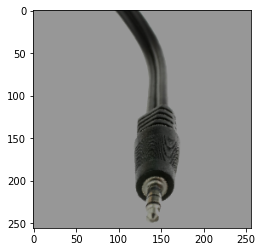

In [7]:
img_arr = exp_gen.next()
plt.imshow(img_arr[0][0]/255)

In [8]:
# Compile the model and the checkpoint to save only the best
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
checkpoint = ModelCheckpoint(MODEL_DIR, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

In [9]:
# Train the model and save only the best
model.fit(train_generator, epochs=NUM_EPOCHS, validation_data=val_generator, callbacks=[checkpoint])

Epoch 1/25
16/16 [==============================] - ETA: 0s - loss: 6.6703 - accuracy: 0.5229
Epoch 00001: val_accuracy improved from -inf to 0.38672, saving model to ModelDir\MobileNetV2\TransferLearning
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: ModelDir\MobileNetV2\TransferLearning\assets
16/16 [==============================] - 48s 3s/step - loss: 6.6703 - accuracy: 0.5229 - val_loss: 7.1744 - val_accuracy: 0.3867
Epoch 2/25
16/16 [==============================] - ETA: 0s - loss: 1.9494 - accuracy: 0.8203
Epoch 00002: val_accuracy did not improve from 0.38672
16/16 [==============================] - 31s 2s/step - loss: 1.9494 - accuracy: 0.8203 - val_loss: 12.2145 - val_accuracy: 0.3516
Epoch 3/25
16/16 [==============================] - ETA: 0s - loss: 1.938

KeyboardInterrupt: 